<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S12/EVA4_S12_B_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Initialization

Import required modules

In [0]:
import numpy as np
import json
import pprint

from annotater import Annotater

## Annotated BBox Data

Used this tool - http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html to annotate 50 images of dogs.

dog_images: '**data/annotations/dogs**'

dog_annotations: '**data/annotations/annotations_dogs.json**'

In [2]:
in_path = "/content/data/annotations/annotations_dogs.json"
with open(in_path, 'r') as f:
			annotations = json.load(f)
print(annotations.keys(), "\n")
pprint.pprint(annotations["images"][0])
print()
pprint.pprint(annotations["annotations"][0])
print()
pprint.pprint(annotations["categories"][0])

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories']) 

{'date_captured': '',
 'file_name': 'dog_0.jpg',
 'height': 183,
 'id': 0,
 'license': 1,
 'width': 275}

{'area': 32041,
 'bbox': [2, 2, 179, 179],
 'category_id': 1,
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [2, 2, 181, 2, 181, 181, 2, 181]}

{'id': 1, 'name': 'dog', 'supercategory': 'class'}


The downloaded annotations are COCO format

*   **images.file_name**: image file name
*   **images.height**: height of the image
*   **images.width**: width of the image
*   **annotations.bbox**: the dimensions of the bounding box in the image in the order: x, y, w, h
  *  **x**: x co-ordinate of top left corner of bbox assuming the origin is at the top left corner of the image
  *  **y**: y co-ordinate of top left corner of bbox assuming the origin is at the top left corner of the image
  *  **w**: width of the bbox
  *  **h**: height of the bbox
*   **categories.name**: the annotated class for the object in the bbox

## Anchor Boxes

Initialize the annotater. Parse the image annotations and generate the scaled bounding boxes

In [3]:
in_path = "/content/data/annotations/annotations_dogs.json"
out_path = "/content/data/annotations/bboxes_dogs.csv"
ant = Annotater(in_path, out_path)

Saved image bbox data at: /content/data/annotations/bboxes_dogs.csv

Showing the first few rows of generated bbox data:

    img_name class  img_h  ...  bbox_scaled_y  bbox_scaled_w  bbox_scaled_h
0  dog_0.jpg   dog    183  ...       0.010929       0.650909       0.978142
1  dog_1.jpg   dog    183  ...       0.087432       0.730909       0.896175
2  dog_2.jpg   dog    168  ...       0.000000       0.783333       0.988095
3  dog_3.jpg   dog    174  ...       0.126437       0.294118       0.764368
4  dog_4.jpg   dog    183  ...       0.065574       0.949091       0.874317

[5 rows x 12 columns]


### Visualise Bounding Boxes

Visualise the scaled bounding boxes of all the images. We. use the log scaled data for clustering as it gives compact and better clusters

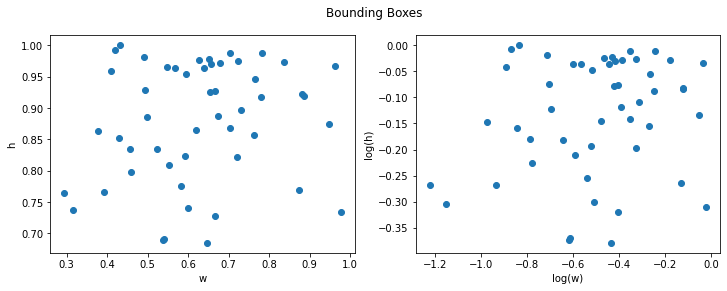

In [4]:
ant.show_bboxes()

### Determine optimal number of clusters

Determine the optimal number of clusters using the elbow method. We train multiple models using a different number of clusters and store the value of the intertia_ property (WCSS) every time

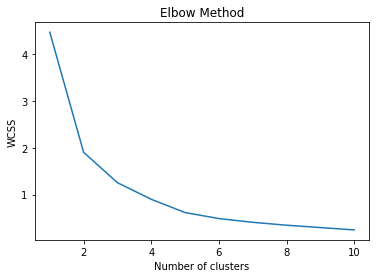

In [5]:
ant.try_cluster()

### Generate Template Bounding Boxes

Get the optimal number of clusters from Elbow method and cluster the data

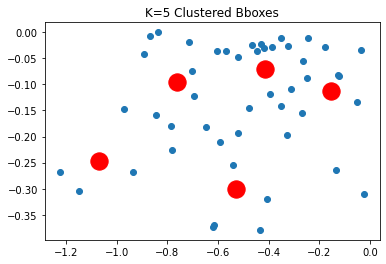

In [6]:
ant.fit(5)

The centroids are the template bounding boxes. Since we clustered the data on log scale, we convert it back to the (0,1) range.

In [7]:
np.exp(ant.centroids)

array([[0.66169087, 0.931878  ],
       [0.85672247, 0.89318779],
       [0.34286633, 0.78120858],
       [0.58829609, 0.74073576],
       [0.46705967, 0.90924726]])